First commit

# updated by jay

First Commit - updated by Ida

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Jupyter display options
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

data_path = "Spotify-2000.csv"

df_raw = pd.read_csv(data_path)

print("Raw shape:", df_raw.shape)
print("Columns:", df_raw.columns.tolist())
df_raw.head()

Raw shape: (1994, 15)
Columns: ['Index', 'Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
rename_dict = {
    "Index": "index_id",
    "Title": "title",
    "Artist": "artist",
    "Top Genre": "top_genre",
    "Year": "year",
    "Beats Per Minute (BPM)": "bpm",
    "Energy": "energy",
    "Danceability": "danceability",
    "Loudness (dB)": "loudness_db",
    "Liveness": "liveness",
    "Valence": "valence",
    "Length (Duration)": "length_sec",
    "Acousticness": "acousticness",
    "Speechiness": "speechiness",
    "Popularity": "popularity"
}
df = df_raw.rename(columns=rename_dict)

In [6]:
df["length_sec"] = pd.to_numeric(df["length_sec"], errors="coerce")

In [8]:
print("Number of rows with invalid length_sec:", df["length_sec"].isna().sum())
df = df.dropna(subset=["length_sec"]).copy()

Number of rows with invalid length_sec: 4


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_id      1990 non-null   int64  
 1   title         1990 non-null   object 
 2   artist        1990 non-null   object 
 3   top_genre     1990 non-null   object 
 4   year          1990 non-null   int64  
 5   bpm           1990 non-null   int64  
 6   energy        1990 non-null   int64  
 7   danceability  1990 non-null   int64  
 8   loudness_db   1990 non-null   int64  
 9   liveness      1990 non-null   int64  
 10  valence       1990 non-null   int64  
 11  length_sec    1990 non-null   float64
 12  acousticness  1990 non-null   int64  
 13  speechiness   1990 non-null   int64  
 14  popularity    1990 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 248.8+ KB
None


In [11]:
df["length_min"] = df["length_sec"] / 60
df["decade"] = (df["year"] // 10) * 10

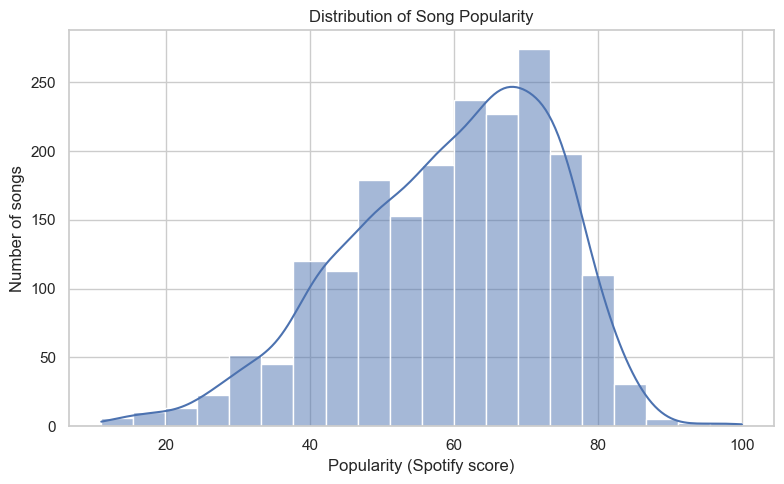

In [24]:
plt.figure()
sns.histplot(df["popularity"], bins=20, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity (Spotify score)")
plt.ylabel("Number of songs")
plt.tight_layout()
plt.savefig("fig_popularity_distribution.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

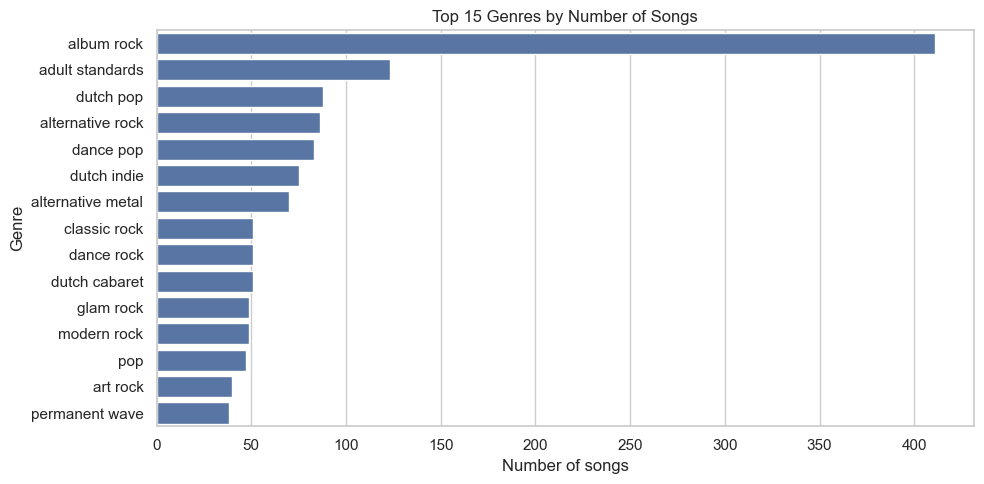

In [25]:
genre_counts = (
    df["top_genre"]
    .value_counts()
    .head(15)
    .rename_axis("top_genre")
    .reset_index(name="count")
)
genre_counts

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_counts, x="count", y="top_genre")
plt.title("Top 15 Genres by Number of Songs")
plt.xlabel("Number of songs")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("fig_top_genres_counts.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

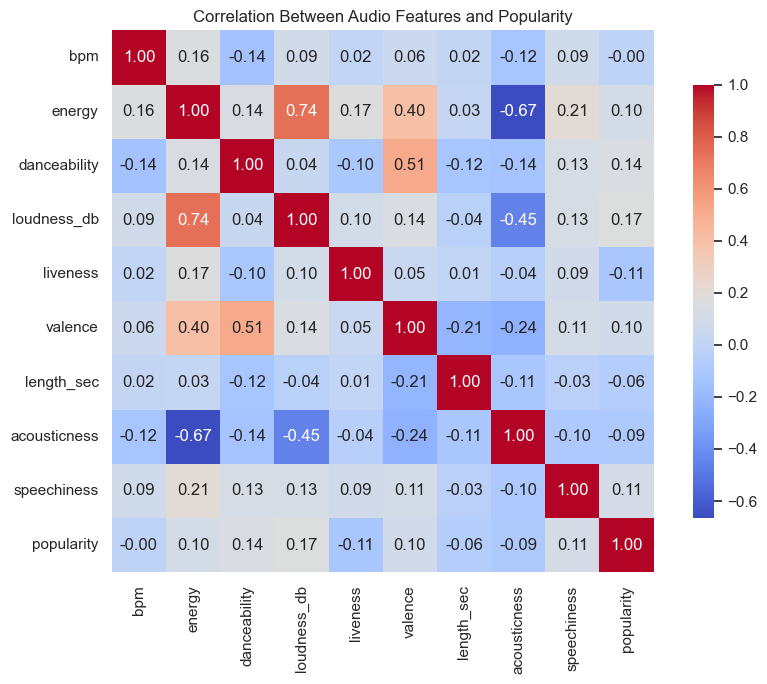

In [26]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Between Audio Features and Popularity")
plt.tight_layout()
plt.savefig("fig_correlation_heatmap.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

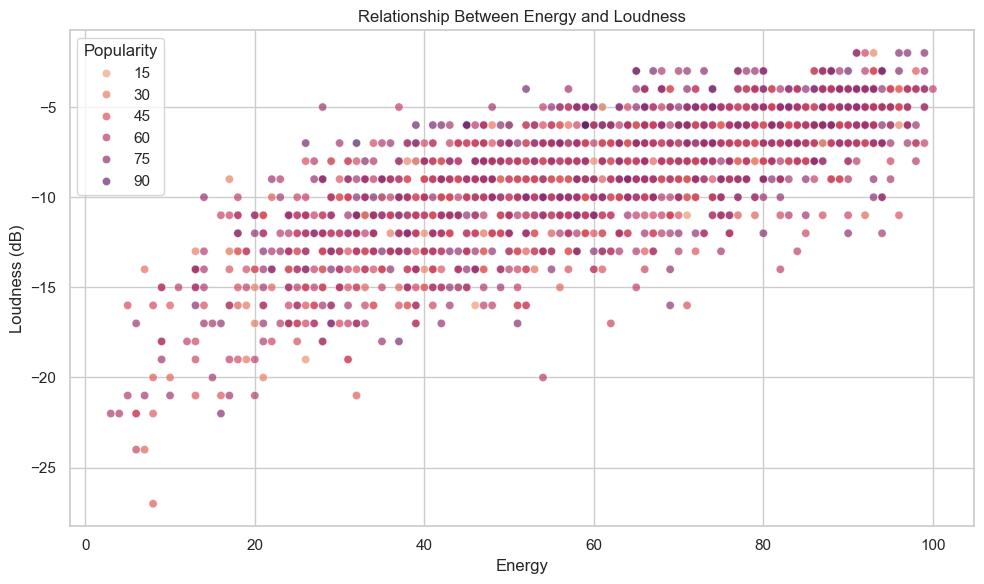

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='energy',
    y='loudness_db',
    hue='popularity',
    palette='flare',
    alpha=0.7
)
plt.title('Relationship Between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.legend(title='Popularity')
plt.tight_layout()
plt.savefig("energy_loudness.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()